## Parte III – Validação Holdout em Problema Não-Linearmente Separável
### Redes Neurais Artificiais - PP2
### Autor: Dayvson Silva - 1915310007
### Data: 05/09/2020

Esta tarefa consistiu em aplicar o percetron de Rosenblatt em uma tarefa Não-linearmente Separável, O primeiro passo foi implementar o percetron em Forma de classe para que a sua ultização posterior tivesse mais clareza. No primeiro momento foi plotado em um  Scatter plot o conjunto de dados, para se comprovar que se tratava de um problema não-linear.

## Importando as bibliotecas usadas na tarefa

In [273]:
import random
import numpy as np
from matplotlib import pyplot as plt
from math import ceil, floor


## Lendo os dados do arquivo dataHoldout.txt

Ao realizar a leitura é todos os exemplos das entradas estão em uma mesma dimensão por isso, foi realizado um reshape no conjunto de dados.

In [239]:
dataset = np.fromfile('../dados/dataHoldout.txt')
number_instances = dataset.shape[0] // 3 ## 3 é quantidade de colunas
dataset = dataset.reshape(number_instances, 3)
dataset

array([[-0.29322959, -0.09065359,  1.        ],
       [ 0.07988839,  0.21101297,  1.        ],
       [-0.07825563, -0.08083512,  1.        ],
       ...,
       [ 0.65980493,  1.05876739,  0.        ],
       [ 1.09867123,  0.87404891,  0.        ],
       [ 0.72930655,  0.93224271,  0.        ]])

## Plotando o conjunto de dados

Imprimindo o cojunto de dados para identificar como os dados estão distribuidos, com a impressão fica claro que os dados são estão dispostos como um problema linear.

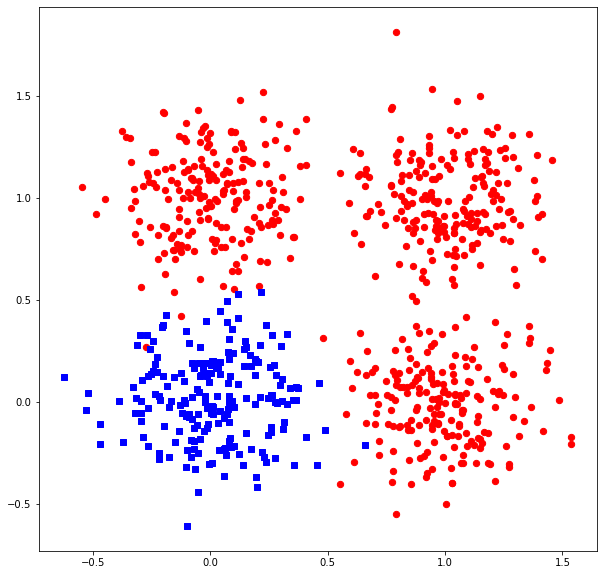

In [240]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(1,1,1)
x = dataset[:,0][dataset[:, 2] == 0.0] # seleciona colunas 0 e targe 0
y = dataset[:,1][dataset[:, 2] == 0.0] # seleciona colunas 1 e targe 0
ax.scatter(x, y, c='r', s=40, marker='o', label='0')
x = dataset[:,0][dataset[:, 2] == 1.0] # seleciona colunas 0 e targe 1
y = dataset[:,1][dataset[:, 2] == 1.0] # seleciona colunas 1 e targe 1
ax.scatter(x, y, c='b', s=40, marker='s', label='0')
plt.show()

Tentando usar uma curva para limitar os dois grupos dentro do conjuto de dados.

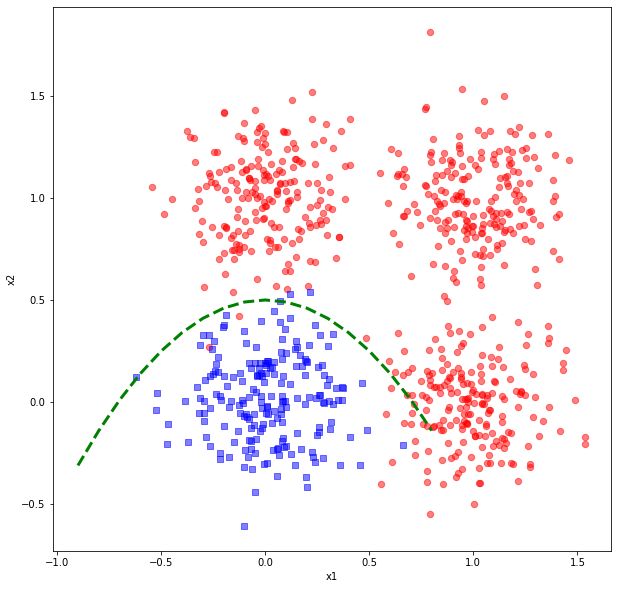

In [241]:
def decision_boundary(x_1):
    """ Calculates the x_2 value for plotting the decision boundary."""
    #return 4 - np.sqrt(-x_1**2 + 4*x_1 + 6 + np.log(16))
    return -x_1**2 + x_1/2000 + 0.5

# Main scatter plot and plot annotation
f, ax = plt.subplots(figsize=(10, 10))
ax.scatter(dataset[:,0][dataset[:,2] == 0.0], dataset[:,1][dataset[:,2] == 0.0], marker='o', color='red', s=40, alpha=0.5)
ax.scatter(dataset[:,0][dataset[:,2] == 1.0], dataset[:,1][dataset[:,2] == 1.0], marker='s', color='blue', s=40, alpha=0.5)
#plt.title('Densities of 2 classes with 25 bivariate random patterns each')
plt.ylabel('x2')
plt.xlabel('x1')

# Adding decision boundary to plot
x_1 = np.arange(-0.9, 0.9, 0.1) #np.array([-.7, .0, .5, .6, .7, .8, 1])
bound = decision_boundary(x_1)
plt.plot(x_1, bound, 'g--', lw=3)
plt.show()

In [242]:
#TODO: criar uma função de fronteira que delimite a os grupos

## Separando os dados em treino e teste

Criando funções para dividir o dataset em treino e teste e plotar esses dados para visualizar como eles estão dispostos

```
@method: criate data train and test

@parameters: dataset, percent

@return: x train and test and y train and test
```

number_instances_train=560
number_instances_test=240


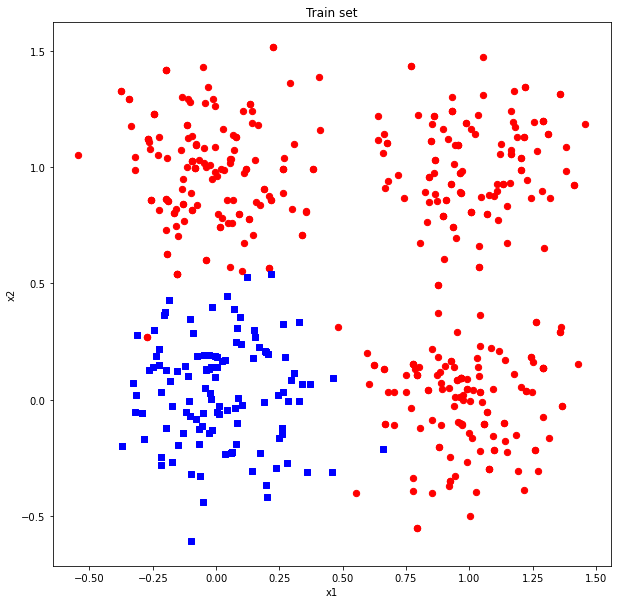

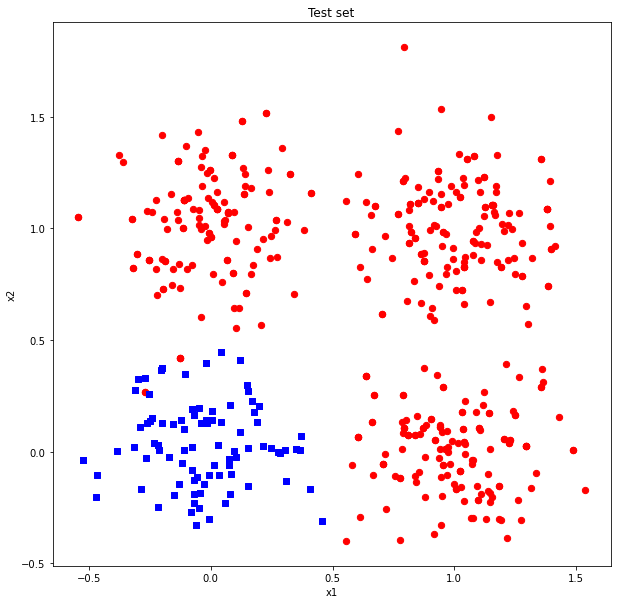

In [306]:
def plot_set(d, title=''):
    f, ax = plt.subplots(figsize=(10, 10))
    ax.scatter(d[:,0][d[:,2] == 0.0], d[:,1][d[:,2] == 0.0], marker='o', color='red', s=40)
    ax.scatter(d[:,0][d[:,2] == 1.0], d[:,1][d[:,2] == 1.0], marker='s', color='blue', s=40)
    plt.title(title)
    plt.ylabel('x2')
    plt.xlabel('x1')

def train_test_split(dataset, percent_train=.7):
    number_instances_train = ceil(len(dataset)*percent_train)
    number_instances_test = len(dataset) - number_instances_train
    print(f'number_instances_train={number_instances_train}')
    print(f'number_instances_test={number_instances_test}')
    index = np.random.randint(low=0, high=len(dataset), size=number_instances_train)
    plot_set(dataset[index], 'Train set')
    plot_set(dataset[~index], 'Test set')
    x_train = dataset[index][:,[0,1]]
    y_train = dataset[index][:, 2]
    x_test = dataset[~index][:, [0,1]]
    y_test = dataset[~index][:, 2]
    return x_train, y_train, x_test, y_test

x_train, y_train, x_test, y_test = train_test_split(dataset, .7)

## Implementado o perceptron de Rosenblatt

In [345]:
class Perceptron(object):
    def __init__(self, no_of_inputs, epoch=100, learning_rate=0.01, baias=-1):
        self.epoch = epoch
        self.learning_rate = learning_rate
        self.weights = np.random.random(no_of_inputs + 1)
        self.baias = baias
    
    def __add_baias(self, inputs):
        new_inputs = []
        for row in inputs:
            new_row = np.insert(row, 0, self.baias)
            new_inputs.append(new_row)
        return np.array(new_inputs)

    def __weight_adjust(self, x_train, y_predicto, y_real):
        erro = y_predicto - y_real
        self.weights = self.weights - self.learning_rate * erro * x_train

    def __activ_func(self, u): 
        if u == 0.0:
            return 1.0
        else:
            return 0.0

    def __error(self, y_predicto, y_real):
        if y_predicto != y_real:
            return True
        else:
            return False
    
    def predict(self, x_test):
        x_test = self.add_baias(x_test)
        y_predicto = []
        for _x_test in x_test:
            u = np.sum(np.dot(_x_test, self.weights))
            y = self.__activ_func(u)
            y_predicto.append(y)
        return np.array(y_predicto)

    def fit(self, x_train, y_train):
        no_erro = False
        epoch = 1
        count_adjust = 0
        x_train = self.__add_baias(x_train)
        while no_erro != True and epoch != self.epoch:
            print("\n\tÉpoca:", epoch)
            print("Pesos:", self.weights)
            print("Quantidade de Ajustes:", count_adjust)
            no_erro = True
            for x, y in zip(x_train, y_train):
                u = np.sum(np.dot(x, self.weights))
                y_predicto = self.__activ_func(u)
                if self.__error(y_predicto, y):
                    self.__weight_adjust(x, y_predicto, y)
                    no_erro = False
                    count_adjust += 1
            epoch += 1
        print("\n\nQuantidade total de épocas:", epoch)
        print("Quantidade total de ajustes:", count_adjust)
        print("Vetor final de pesos:", self.weights)

## Treinando um percetron com o conjuntos de treinamento

In [347]:
perceptron = Perceptron(no_of_inputs=2)
perceptron.fit(x_train, y_train)


	Época: 1
Pesos: [0.06404397 0.63905041 0.47477901]
Quantidade de Ajustes: 0

	Época: 2
Pesos: [-1.43595603  0.63868553  0.51068689]
Quantidade de Ajustes: 150

	Época: 3
Pesos: [-2.93595603  0.63832064  0.54659477]
Quantidade de Ajustes: 300

	Época: 4
Pesos: [-4.43595603  0.63795576  0.58250265]
Quantidade de Ajustes: 450

	Época: 5
Pesos: [-5.93595603  0.63759088  0.61841053]
Quantidade de Ajustes: 600

	Época: 6
Pesos: [-7.43595603  0.637226    0.65431841]
Quantidade de Ajustes: 750

	Época: 7
Pesos: [-8.93595603  0.63686111  0.69022629]
Quantidade de Ajustes: 900

	Época: 8
Pesos: [-10.43595603   0.63649623   0.72613417]
Quantidade de Ajustes: 1050

	Época: 9
Pesos: [-11.93595603   0.63613135   0.76204206]
Quantidade de Ajustes: 1200

	Época: 10
Pesos: [-13.43595603   0.63576646   0.79794994]
Quantidade de Ajustes: 1350

	Época: 11
Pesos: [-14.93595603   0.63540158   0.83385782]
Quantidade de Ajustes: 1500

	Época: 12
Pesos: [-16.43595603   0.6350367    0.8697657 ]
Quantidade de 